In [1]:
'''
    Author - Oyesh Mann Singh
    Date - 11/05/2018
    Description 
        - Practising NLP
        - Text preprocessing
        - Analyzing various ML algorithms
'''

import os
import sys
import time
import re
import string
import unicodecsv as csv
import unicodedata as un
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [2]:
# Checking the raw file
file = open('./data/aclImdb/train/pos/0_9.txt')
print(file.read())

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


In [3]:
# Reading train/text files
pd_train = pd.read_csv('./data/aclImdb/train.csv')
pd_test = pd.read_csv('./data/aclImdb/test.csv')

In [4]:
pd_train.shape

(25001, 2)

In [5]:
pd_train.head()

,label,data
0,0,ashishashishvirtualbox filehomeashishconfiglib...
1,1,i get tired of my and year old daughters con...
2,1,this movie is outrageous funny ribald sophisti...
3,1,i have to start saying it has been a long time...
4,1,if the very thought of arthur askey twists you...


In [6]:
train_token_count = 0
test_token_count = 0

for each_row in pd_train['data']:
    train_token_count += len(each_row)
    
for each_row in pd_test['data']:
    test_token_count += len(each_row)

print("Number of tokens in train = ", train_token_count)
print("Number of tokens in test = ", test_token_count)

Number of tokens in train =  31408174
Number of tokens in test =  30660597


In [7]:
print("Avg Number of tokens in each sentence in train = ", train_token_count/pd_train.shape[0])
print("Avg Number of tokens in each sentence in test = ", test_token_count/pd_test.shape[0])

Avg Number of tokens in each sentence in train =  1256.2767089316428
Avg Number of tokens in each sentence in test =  1226.42388


In [8]:
from nltk.util import ngrams
from collections import Counter

# Putting all data into a list
train_tokens_list = pd_train.data.tolist()
test_tokens_list = pd_test.data.tolist()

In [9]:
# Testing if the token_list can be easily tokenized
train_tokens_list[10].split()[5]

'acted'

In [10]:
# Testing if the token_list can be easily tokenized
test_tokens_list[10].split()[5]

'up'

In [11]:
tokens = []
for each in train_tokens_list:
    for i in each.split():
        tokens.append(i)

In [12]:
# Checking the most commong trigrams
text_trigrams = ngrams(tokens, 3)

Counter(text_trigrams).most_common(10)

[(('one', 'of', 'the'), 4815),
 (('this', 'movie', 'is'), 2476),
 (('of', 'the', 'film'), 2363),
 (('a', 'lot', 'of'), 2255),
 (('this', 'is', 'a'), 2140),
 (('of', 'the', 'movie'), 2039),
 (('some', 'of', 'the'), 1855),
 (('is', 'one', 'of'), 1746),
 (('the', 'film', 'is'), 1686),
 (('this', 'film', 'is'), 1669)]

In [13]:
# Checking the most commong trigrams
text_trigrams = ngrams(tokens, 4)

Counter(text_trigrams).most_common(10)

[(('is', 'one', 'of', 'the'), 1099),
 (('the', 'rest', 'of', 'the'), 1006),
 (('one', 'of', 'the', 'most'), 853),
 (('the', 'end', 'of', 'the'), 737),
 (('one', 'of', 'the', 'best'), 713),
 (('i', 'have', 'ever', 'seen'), 578),
 (('this', 'is', 'one', 'of'), 567),
 (('at', 'the', 'same', 'time'), 475),
 (('one', 'of', 'the', 'worst'), 454),
 (('at', 'the', 'end', 'of'), 431)]

In [14]:
# Checking the most commong trigrams
text_unigram = ngrams(tokens, 1)

c = Counter(text_unigram)

# Get total count of unique words
len(c)

138189

In [15]:
from nltk import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a tokenizer
tokenizer = TweetTokenizer()

In [16]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)

In [17]:
# Merge train and test list
full_text = train_tokens_list + test_tokens_list

In [18]:
unique_count = Counter(full_text)

In [19]:
%%time
vectorizer.fit(full_text)

CPU times: user 1min 10s, sys: 412 ms, total: 1min 10s
Wall time: 1min 10s


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f2865e7bd30>>,
        use_idf=True, vocabulary=None)

In [20]:
len(vectorizer.get_feature_names())

2694176

In [21]:
print(vectorizer.get_feature_names()[1:10])

['a a', 'a aa', 'a abandoned', 'a about', 'a absent', 'a absolute', 'a absolutely', 'a absolutley', 'a absurd']


In [22]:
# Shuffle the data
pd_train = pd_train.sample(frac=1).reset_index(drop=True)
pd_test = pd_test.sample(frac=1).reset_index(drop=True)

In [23]:
# Check the data after shuffled
pd_train.head()

,label,data
0,2,i am so insulted by this movie its not even fu...
1,1,bedknobs broomsticks is another one of disney...
2,2,although theres flying guillotines as part of ...
3,1,spoilers is a very good and very realistic do...
4,1,of all arnolds mids movies who would have thou...


In [24]:
# Transform our input train/test data
train_vectorized = vectorizer.transform(pd_train.data)
test_vectorized = vectorizer.transform(pd_test.data)

In [25]:
# Check the shape of transformed vector
print(train_vectorized.shape)

(25001, 2694176)


In [26]:
# Testing with random new review
review = ["This movie is fine", "Nobody watched the movie"]

# Print the prediction of new reviews
def print_prediction(review, est):
    print("*****EVALUATE REVIEW*******")
    review_vectorized = vectorizer.transform(review)
    y_pred = est.predict(review_vectorized)
    for each_review, each_y_pred in zip(review, y_pred):
        if each_y_pred == 1:
            pred_review = "Negative"
        else:
            pred_review = "Positive"
        print("{0}: {1}".format(each_review, pred_review))
        
        
def print_acc(est, acc):
    print("Accuracy of {0}: {1:2.3%}".format(est, acc))

# MACHINE LEARNING SECTION STARTS

In [47]:
%%time
'''
    Logistic Regression
'''
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)

ovr.fit(train_vectorized, pd_train.label.values)
ovr_acc = ovr.score(test_vectorized, pd_test.label.values)

print("One vs Rest Logisitic Regression accuracy = ", ovr_acc)

One vs Rest Logisitic Regression accuracy =  0.88616
Wall time: 7.06 s


In [48]:
print_prediction(review, ovr)

*****EVALUATE REVIEW*******
This movie is fine: Positive
Nobody watched the movie: Negative


In [41]:
%%time
'''
    Cross Validation Logistic Regression
'''
from sklearn.model_selection import cross_validate, cross_val_score
import numpy as np

cv_ovr = LogisticRegression()

cv_ovr = cross_validate(cv_ovr, train_vectorized, pd_train.label.values, scoring='accuracy', n_jobs=-1, cv=10)

NameError: name 'LogisticRegression' is not defined

In [35]:
print(cv_ovr['test_score'])

[0.8768 0.8872 0.8908 0.8928 0.894  0.886  0.8932 0.8904 0.8828 0.894 ]


In [36]:
print('Cross-validation mean (test) accuracy {0:.2f}%, std {1:.2f}.'.format(np.mean(cv_ovr['test_score']) * 100, np.std(cv_ovr['test_score']) * 100))

Cross-validation mean (test) accuracy 88.88%, std 0.54.


In [92]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

ovr = LogisticRegression()

param_grid = {'C': [1, 10, 100, 1000] }

ovr_grid = GridSearchCV(ovr, param_grid=param_grid, cv=5, refit=True, verbose=1)

ovr_grid_fit = ovr_grid.fit(train_vectorized, pd_train.label.values)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.9min finished


Wall time: 5min 16s


In [95]:
ovr_grid_score = ovr_grid_fit.score(test_vectorized, pd_test.label.values)
print_acc(acc=ovr_grid_score, est='Logistic Regression CV')

Accuracy of Logistic Regression CV: 90.384%


In [96]:
# Testing with random new review
print_prediction(review, ovr_grid_fit)

Movie was good: Positive
There was normal acting: Negative


In [38]:
%%time
'''
    SVM
'''

from sklearn.svm import SVC

my_svm = SVC()

my_svm.fit(train_vectorized, pd_train.label.values)

svm_acc = my_svm.score(test_vectorized, pd_test.label.values)
print('SVM accuracy', svm_acc)

SVM accuracy 0.6966
Wall time: 1h 2min 31s


In [39]:
'''
    SVM accuracy 0.6966
    Wall time: 1h 2min 31s
'''

# Evaluate the trained algorithm with new data
print_prediction(review, my_svm)

This movie is fine: Positive
The movie is not fine: Positive


In [ ]:
%%time
'''
    Grid Search CV SVM
'''
from sklearn.model_selection import GridSearchCV

svm_grid = SVC()

param_grid = {'C': [1, 10, 100, 1000], 'gamma': [1e-3, 1e-4]}

svm_grid = GridSearchCV(svm_grid, param_grid=param_grid, cv=5, refit=True, verbose=1)

svm_grid_fit = svm_grid.fit(train_vectorized, pd_train.label.values)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [49]:
%%time
'''
    Naive Bayes MultinomialNB
'''

from sklearn.naive_bayes import MultinomialNB, BernoulliNB 

nb_clf = MultinomialNB()
nb_clf.fit(X=train_vectorized, y=pd_train.label.values)
nb_score = nb_clf.score(test_vectorized, pd_test.label.values)

print_acc('MultinomialNB', nb_score)

review = ['Movie was good', 'There was normal acting']
print_prediction(review, nb_clf)

Accuracy of MultinomialNB: 86.336%
*****EVALUATE REVIEW*******
Movie was good: Negative
There was normal acting: Negative
Wall time: 641 ms


In [50]:
%%time
'''
    Naive Bayes BernoulliNB
'''

nb_bern_clf = BernoulliNB()
nb_bern_clf.fit(X=train_vectorized, y=pd_train.label.values)
nb_bern_score = nb_bern_clf.score(test_vectorized, pd_test.label.values)

print_acc('MultinomialNB', nb_bern_score)

print_prediction(review, nb_bern_clf)

Accuracy of MultinomialNB: 85.084%
*****EVALUATE REVIEW*******
Movie was good: Negative
There was normal acting: Negative
Wall time: 1.19 s


In [97]:
%%time
'''
    KNN Classifier
'''

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X=train_vectorized, y=pd_train.label.values)
knn_score = knn_clf.score(test_vectorized, pd_test.label.values)

print_acc('KNN Classifier', knn_score)

print_prediction(review, knn_clf)

Accuracy of KNN Classifier: 68.012%
Movie was good: Positive
There was normal acting: Negative
Wall time: 5min 32s


In [50]:
%%time
'''
    Grid Search CV kNN Classifier
'''
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_clf_grid = KNeighborsClassifier()

param_grid = {'n_neighbors': [1, 2, 3, 5, 10]}

knn_clf_grid = GridSearchCV(knn_clf_grid, param_grid=param_grid, cv=5, refit=True, verbose=1)

knn_grid_fit = knn_clf_grid.fit(train_vectorized, pd_train.label.values)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/oyashi/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 24min 1s, sys: 1min 8s, total: 25min 10s
Wall time: 24min 15s


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 24.3min finished


In [108]:
print_acc(acc=knn_grid_fit.best_score_, est='GridSearch kNN')

review = ['He watched a movie', 'He was awarded for that kind of acting']
print_prediction(review, knn_grid_fit.best_estimator_)

Accuracy of GridSearch kNN: 74.669%
*****EVALUATE REVIEW*******
He watched a movie: Negative
He was awarded for that kind of acting: Positive


In [39]:
%%time
'''
    Perceptron
'''

from sklearn.linear_model import Perceptron

percept = Perceptron(tol=1e-3, random_state=0)
percept.fit(X=train_vectorized, y=pd_train.label.values)
percept_score = percept.score(test_vectorized, pd_test.label.values)

print_acc('Perceptron Classifier', percept_score)

Accuracy of Perceptron Classifier: 88.244%
Wall time: 516 ms


In [40]:
review = ['He watched a good movie', 'nothing is good']
print_prediction(review, percept)

*****EVALUATE REVIEW*******
He watched a good movie: Negative
nothing is good: Negative


In [97]:
%%time
'''
    Grid Search CV Perceptron
'''
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron

percept_grid = Perceptron()

param_grid = {'alpha':[0.0001, 0.001, 0.01, 0.1],'max_iter': [10, 50, 100, 200]}

percept_grid = GridSearchCV(percept_grid, param_grid=param_grid, cv=5, refit=True, verbose=1)

percept_grid_fit = percept_grid.fit(train_vectorized, pd_train.label.values)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/home/oyashi/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 16.6min finished


CPU times: user 17min 39s, sys: 2.45 s, total: 17min 41s
Wall time: 16min 45s


In [107]:
print_acc('GridSearch CV Perceptron Classifier', percept_grid_fit.best_score_)

review = ['He watched a good movie', 'The hall seats were empty']
print_prediction(review, percept_grid_fit.best_estimator_)

Accuracy of GridSearch CV Perceptron Classifier: 88.984%
*****EVALUATE REVIEW*******
He watched a good movie: Positive
The hall seats were empty: Negative


In [51]:
%%time
'''
    Multi Layered Perceptron - lbfgs
'''

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X=train_vectorized, y=pd_train.label.values)
mlp_score = mlp.score(test_vectorized, pd_test.label.values)

print_acc('MultiLayered Perceptron Classifier', mlp_score)

Accuracy of MultiLayered Perceptron Classifier: 89.840%
Wall time: 3min 58s


In [61]:
review = ['He watched a stupid movie', '']
print_prediction(review, mlp)

*****EVALUATE REVIEW*******
He watched a stupid movie: Negative
hall was not: Positive


In [62]:
%%time
'''
    Multi Layered Perceptron - sgd
'''

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X=train_vectorized, y=pd_train.label.values)
mlp_score = mlp.score(test_vectorized, pd_test.label.values)

print_acc('MultiLayered Perceptron Classifier', mlp_score)

Accuracy of MultiLayered Perceptron Classifier: 53.448%
Wall time: 10min 32s


In [70]:
review = ['He watched a good movie', 'what a flop movie']
print_prediction(review, mlp)

*****EVALUATE REVIEW*******
He watched a good movie: Positive
what a flop movie: Positive


In [ ]:
%%time
'''
    Multi Layered Perceptron - adam
'''

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X=train_vectorized, y=pd_train.label.values)
mlp_score = mlp.score(test_vectorized, pd_test.label.values)

print_acc('MultiLayered Perceptron Classifier', mlp_score)

In [ ]:
%%time
'''
    Grid Search CV Multi Layered Perceptron
'''
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp_grid = MLPClassifier(alpha=1e-5, random_state=1, hidden_layer_sizes=(10,5))

param_grid = {'solver':['lbfgs', 'sgd', 'adam']}

mlp_grid = GridSearchCV(mlp_grid, param_grid=param_grid, cv=5, refit=True, verbose=1)

mlp_grid_fit = mlp_grid.fit(train_vectorized, pd_train.label.values)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
print_acc('Grid Search CV Multi Layered Perceptron', mlp_grid_fit.best_score_)

In [27]:
%%time
'''
    Gradient Boosting Classifier
    
    # Didn't run this
    # It took lot of time
'''

from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier()

grad_boost.fit(train_vectorized, pd_train.label.values)

grad_boost_score = grad_boost.score(test_vectorized, pd_test.label.values)

CPU times: user 24 ms, sys: 4 ms, total: 28 ms
Wall time: 47.6 ms


In [32]:
%%time
'''
    Decision Tree
    
    NOTE: Decision Trees/Random Forest suffer badly in very high dimensional feature spaces. 
'''

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

# decision_tree.fit(train_vectorized, pd_train.label.values)

# decision_tree_score = decision_tree.score(test_vectorized, pd_test.label.values)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 30.5 µs


# VISUALIZATION SECTION STARTS

In [62]:
%%time
'''
    Collocate Cloud Visualization
'''

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=480, height=480, margin=0).generate(str(train_tokens_list))

CPU times: user 26.7 s, sys: 412 ms, total: 27.1 s
Wall time: 27.1 s


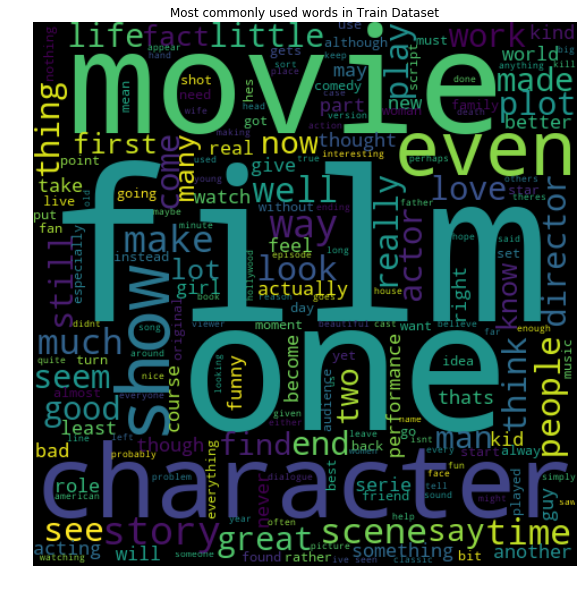

In [57]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most commonly used words in Train Dataset")
plt.margins(x=0, y=0)
plt.show()

In [58]:
wordcloud_test = WordCloud(width=480, height=480, margin=0).generate(str(test_tokens_list))

In [ ]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.title("Most commonly used words in Test Dataset")
plt.margins(x=0, y=0)
plt.show()

In [97]:
'''
    Top 100 words
'''

# Creating stop words
text_unigram = ngrams(tokens, 1)

# Most common 50 words
stop_words = Counter(text_unigram).most_common(50)

stop_word_list = []
for item in stop_words:
    stop_word_list += item[0]

print(stop_word_list)

In [103]:
# Removed the words present in stop_word_list
filtered_tokens = [w for w in tokens if not w in stop_word_list] 

In [109]:
# Created unigram
filtered_text_unigram = ngrams(filtered_tokens, 1)

# Create counter
text_uni = Counter(filtered_text_unigram).most_common(100)

In [114]:
# Created dictionary for top 100 words
uni_dict = {}
for each in text_uni:
    uni_dict[each[0][0]] = each[1]

In [118]:
# Created word cloud for top 100 words
top_word_cloud = WordCloud(width=480, height=480, margin=0).generate_from_frequencies(uni_dict)

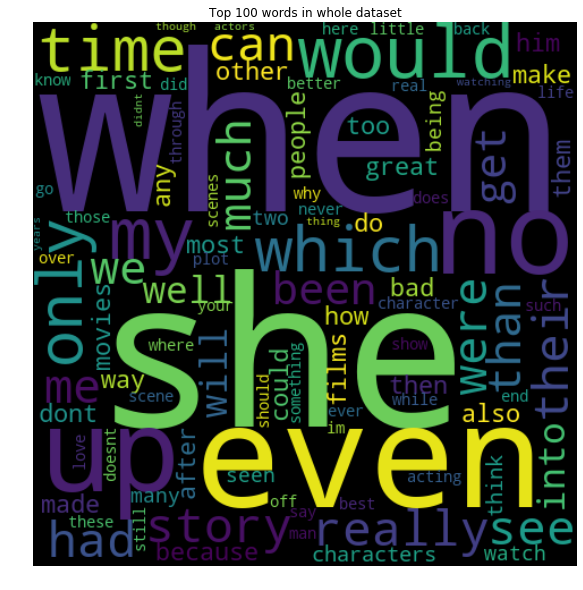

In [119]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(top_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 100 words in whole dataset")
plt.margins(x=0, y=0)
plt.show()

In [136]:
# Created unigram
filtered_text_unigram = ngrams(filtered_tokens, 1)

# Create counter for least commonly used words
text_uni_least = Counter(filtered_text_unigram).most_common()[-100:]

In [ ]:
rin

In [138]:
# Created dictionary for least 100 words
uni_dict_least = {}
for each in text_uni_least:
    uni_dict_least[each[0][0]] = each[1]

In [139]:
# Created word cloud for least 100 words
top_word_cloud = WordCloud(width=480, height=480, margin=0).generate_from_frequencies(uni_dict_least)

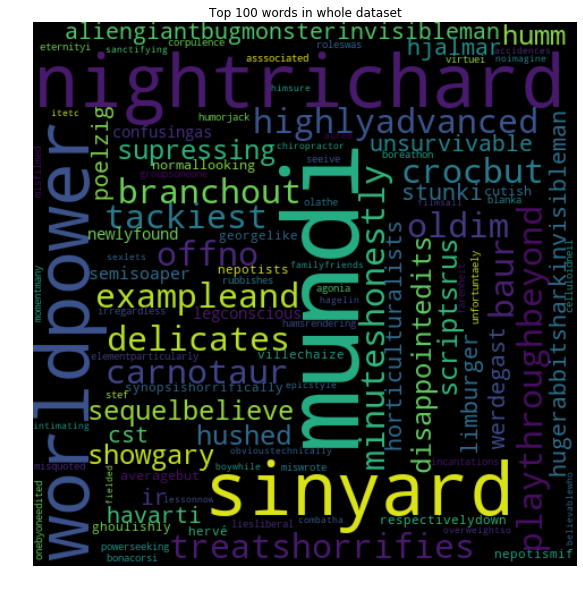

In [142]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(top_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 100 words in whole dataset")
plt.margins(x=0, y=0)
plt.show()

In [117]:
'''
    Visualization
        - Tag cloud
        - Highest/Lower top 10 words
        - Highest gram word
        - nltk vader
'''

'\n    Visualization\n        - Tag cloud\n        - Highest/Lower top 10 words\n        - Highest gram word\n        - nltk vader\n'

In [ ]:
'''
    Start Deep learning
'''